## Plot SS Bouncepoints

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sqlite3
conn = sqlite3.connect("ss.db")
cur  = conn.cursor()

import time
import os

import pandas as pd

qry = """SELECT bouncepoints_full.ID_Full, 
bouncepoints_full.Event, 
bouncepoints_full.Station, 
bouncepoints_full.Network, 
bouncepoints_full.Range, 
bouncepoints_full.MidLat, 
bouncepoints_full.MidLon, 
bouncepoints_full.EvtTime, 
bouncepoints_full.BAzimuth, 
snr.SNR
FROM bouncepoints_full
LEFT JOIN snr 
ON bouncepoints_full.ID_Full=snr.ID_Full
WHERE snr.SNR > 3.0 """

dfds = pd.read_sql_query(qry, conn, index_col=["ID_Full"])
dfds

conn.close()

dfds

,Event,Station,Network,Range,MidLat,MidLon,EvtTime,BAzimuth,SNR
ID_Full,,,,,,,,,
B040591B.II.TLY,B040591B,TLY,II,142.615935,57.099525,-74.290769,1991-04-05T15:50:54.600000Z,358.819453,5.878652
B070191B.II.TLY,B070191B,TLY,II,144.277687,56.229911,-72.580455,1991-07-01T13:32:47.800000Z,357.803087,10.153770
C111991G.XC.MAQI,C111991G,MAQI,XC,140.835339,74.868097,-65.119081,1991-11-19T22:29:01.100000Z,355.991168,3.109796
B042492F.II.GAR,B042492F,GAR,II,150.211576,66.014258,-108.840249,1992-04-24T17:38:57.200000Z,359.653141,3.951417
B051692F.XC.MAQI,B051692F,MAQI,XC,158.968951,65.034636,-60.712642,1992-05-16T20:58:08.500000Z,351.976198,3.146959
B071692B.G.WUS,B071692B,WUS,G,143.250960,66.182202,-121.138513,1992-07-16T06:35:43.600000Z,8.492204,3.105225
C091092A.US.RSNY,C091092A,RSNY,US,112.243067,16.548956,-132.928728,1992-09-10T10:43:23.100000Z,259.937661,4.135436
C112892B.II.TLY,C112892B,TLY,II,159.712463,47.642923,-60.999851,1992-11-28T03:13:38.000000Z,349.601037,4.062384
C031593F.II.ERM,C031593F,ERM,II,148.134294,23.890093,-127.315023,1993-03-15T16:09:09.700000Z,71.814407,4.492630


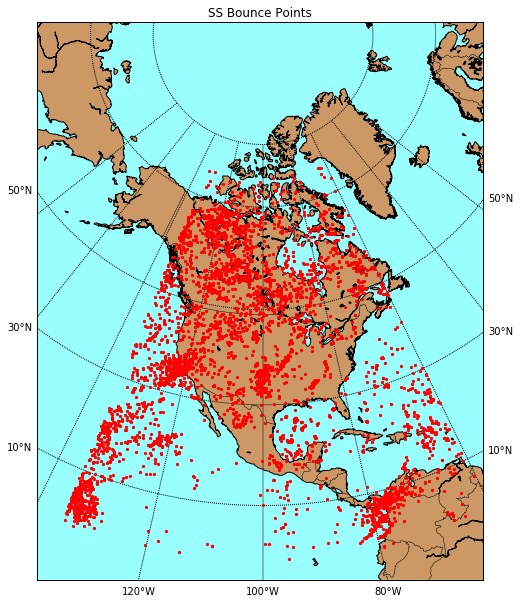

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# Lambert Conformal Conic map.
m = Basemap(llcrnrlon=-135.,llcrnrlat=-10.,urcrnrlon=45.,urcrnrlat=61.,
            projection='lcc',lat_1=35.,lat_2=45.,lon_0=-100.,
            resolution ='l',area_thresh=1000.)
# read shapefile.
#shp_info = m.readshapefile('../../../examples/huralll020','hurrtracks',drawbounds=False)
# find names of storms that reached Cat 4.
names = []

plt.figure(1,figsize=(10,10))

# draw coastlines, meridians and parallels.
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(10,71,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180,0,20),labels=[0,0,0,1])

x, y = m( np.array(dfds['MidLon']), np.array(dfds['MidLat']) )

m.scatter(x, y, color='red', marker = '.', zorder = 10000)

plt.title('SS Bounce Points')
plt.savefig('bpts_NA.eps')
plt.show()

In [3]:
from numpy import arange
from obspy.geodetics.base import gps2dist_azimuth

lons = arange(-140,-59,10)
lats = arange(30,71,10)

df = pd.DataFrame(columns=['Latitude', 'Longitude', 'Radius'])

radius = 10.0


ii=1
for lat in lats:
    for lon in lons:
        df.loc[ii]=[lat,lon,radius]
        ii += 1


dfbinning = pd.DataFrame(columns=['BinNumber','ID_Full','Radius'])


ii=1
for thebin in df.iterrows():
    for bp in dfds.iterrows():
        delm, az, baz = gps2dist_azimuth(thebin[1].Latitude, thebin[1].Longitude , bp[1].MidLat, bp[1].MidLon)
        deldeg = delm/1000./111.11
        if deldeg < 10.:
            dfbinning.loc[ii]=[thebin[0],bp[0],deldeg]
            ii += 1
    

In [4]:
dfbinning.query("BinNumber == 3")

,BinNumber,ID_Full,Radius
425,3,C031593F.II.ERM,8.932127
426,3,C071193A.II.ERM,6.615283
427,3,M122894C.GT.LPAZ,6.683267
428,3,C010695F.GT.LPAZ,6.894203
429,3,C080395B.IU.INCN,8.907678
430,3,M022196B.IU.ADK,5.203347
431,3,C041996A.IU.INCN,8.296975
432,3,C061097B.II.NRIL,5.857000
433,3,C101597A.IU.YSS,6.918995
434,3,C013098B.IU.YSS,3.012560
